In [183]:
#Import pandas and numpy and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [188]:
#Check the directory address
import os
os.getcwd()

'/Users/shayan'

In [18]:
#Locate the file
filename='/Users/shayan/Desktop/IBM Data Science/auto.csv'

In [21]:
#Change headers
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [30]:
#Read the file
df = pd.read_csv(filename, names=headers)

In [31]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [25]:
#Get dimensions of df
df.shape

(205, 26)

In [189]:
#Cleaning

#Replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,Low


In [38]:
#look for NaN (NaN=True)
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
#Get sum #NaN for each column
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [44]:
#Get types of data 
#Find types of data with NaN
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [132]:
#Cleaning: Replace NaN (continuous data)

#Get average values for float columns with NaN
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
avg_bore=df['bore'].astype('float').mean(axis=0)
avg_stroke=df['stroke'].astype('float').mean(axis=0)
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
avg_price=df['price'].astype('float').mean(axis=0)

#Replace with average values
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
df["bore"].replace(np.nan, avg_bore, inplace=True)
df['stroke'].replace(np.nan, avg_stroke, inplace=True)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)
df['price'].replace(np.nan, avg_price, inplace=True)

In [46]:
#Cleaning: Replace NaN (categorical data)

#Get most-repeated values for object columns with NaN
df['num-of-doors'].value_counts()
df['num-of-doors'].value_counts().idxmax()

#Replace with most-repeated values
df["num-of-doors"].replace(np.nan, "four", inplace=True)

'four'

In [47]:
#Convert to correct format
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

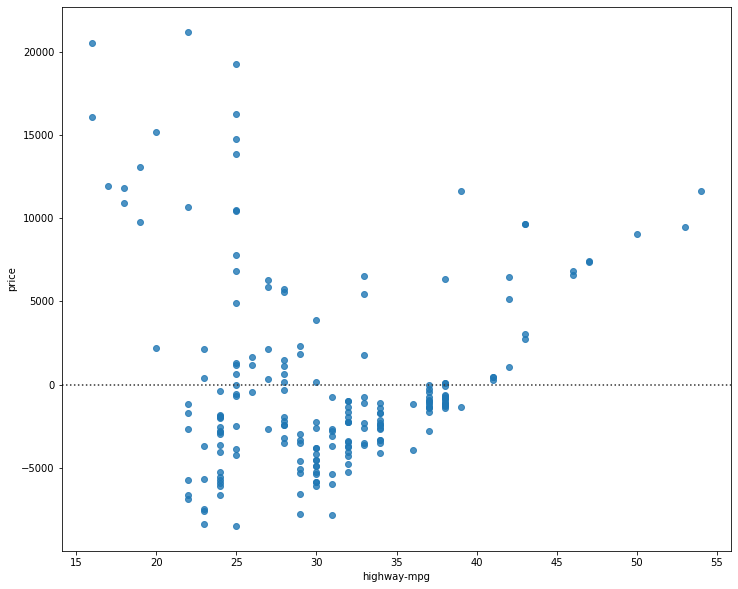

In [48]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [49]:
#Unit Conversion: Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

In [51]:
#Normalization: replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height']=df['height']/df['height'].max()

Text(0.5, 1.0, 'horsepower bins')

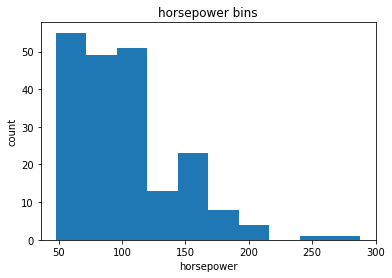

In [56]:
#Histogram

#Correct the format
df["horsepower"]=df["horsepower"].astype(int, copy=True)

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

#Set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

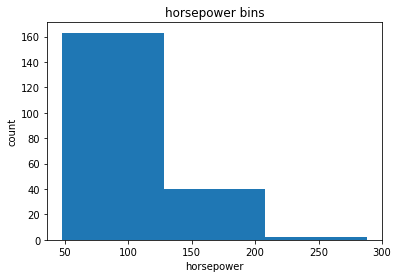

In [62]:
#Histogram with specified No of Bins

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)

# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

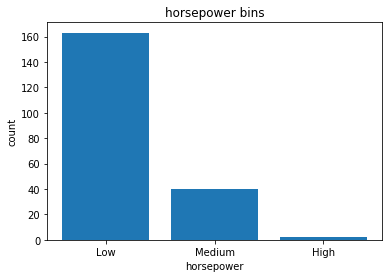

In [61]:
#Bar plot

#Change bins
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

#Categorize grouping
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)
df["horsepower-binned"].value_counts()

#Bar plot
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

#Set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [64]:
#Find correlation
df.corr()

#Correlation for specific columns
df[['bore','stroke' ,'compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055909,0.005201,0.575707
stroke,-0.055909,1.000000,0.186105,0.088133
compression-ratio,0.005201,0.186105,1.000000,-0.205717
horsepower,0.575707,0.088133,-0.205717,1.000000


,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


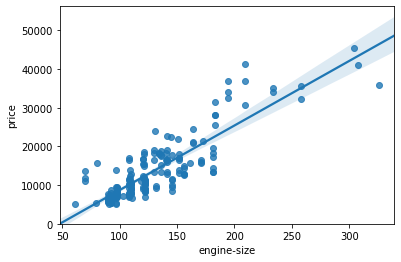

In [68]:
#Correlation plot (linear regression)

#Find linear relationship
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

#Correlation
df[["engine-size", "price"]].corr()

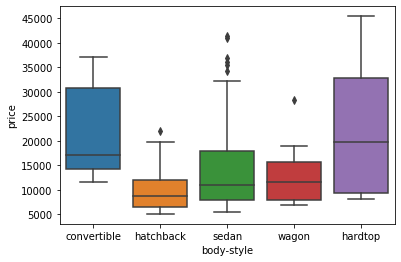

In [69]:
#Box plot for categorical data
sns.boxplot(x="body-style", y="price", data=df)

In [134]:
#Correlation Table

#Value counts
df['drive-wheels'].value_counts()
df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

#Find categories
df['drive-wheels'].unique()

#Grouping (based on 1 column)
df_group_one = df[['drive-wheels','body-style','price']]
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

#Grouping (based on 2 columns)
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1


,drive-wheels,body-style,price
0,4wd,hatchback,10405.064677
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9930.934363
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


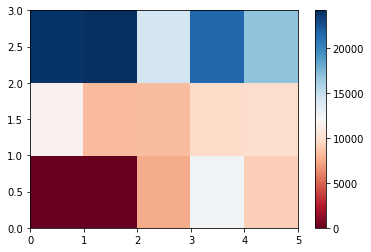

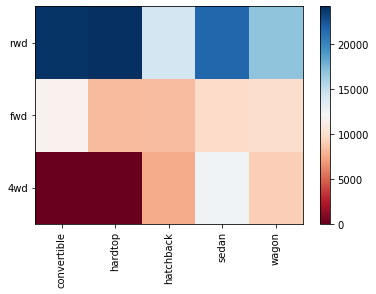

In [78]:
#Heat Map

#Pivoting the table (some NaN will be produced as no value might be avilable for the category)
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')

#Fill missing values with 0 
grouped_pivot = grouped_pivot.fillna(0) 

#Genrate heat map: use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()

#Adding stuff to heat map
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [123]:
#Correlation coeff and P-value (make sure there is no NaN in data)
from scipy import stats

pearson_coef, p_value = pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 


The Pearson Correlation Coefficient is 0.8617522436859721  with a P-value of P = 9.669661923634776e-62


In [136]:
#ANOVA test

#grouping
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])

#Example: sub-grouping
grouped_test2.get_group('4wd')['price']

#Anova for sub-groups
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
print( "ANOVA results: F=", f_val, ", P =", p_val)   
 

ANOVA results: F= 67.5036668266912 , P = 3.5392707916047903e-23


The R-square is:  0.47682578947968457
The mean square error of price and predicted value is:  32235628.28938213


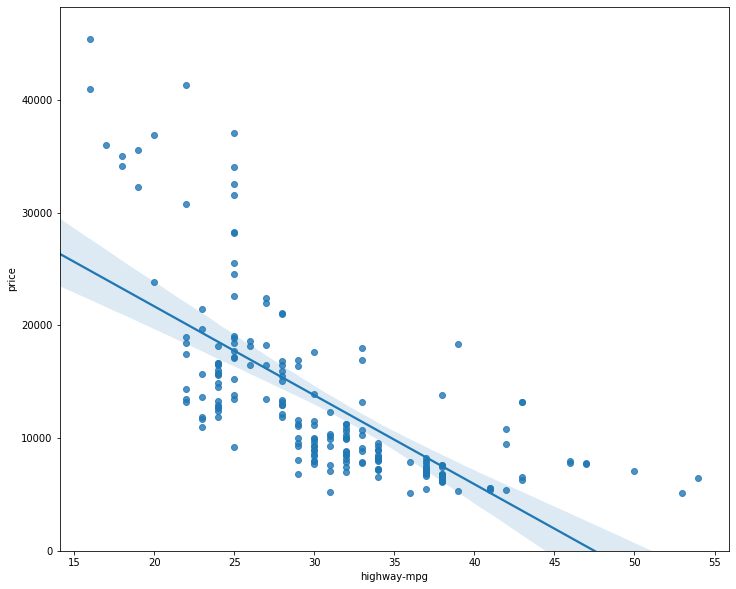

In [170]:
#Liner Regression  (𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)      
lm.intercept_
lm.coef_

#Regression plot

import seaborn as sns
%matplotlib inline 

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

#Prediction   
Yhat=lm.predict(X)
Yhat[0:5] 

#Evaluation
#R-squared, also known as the coefficient of determination. The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.
#The Mean Squared Error (MSE) measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).

#Find the R^2
#Fit the model
lm.fit(X, Y)
print('The R-square is: ', lm.score(X, Y))

#Find MSE
#Prediction
Yhat=lm.predict(X)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

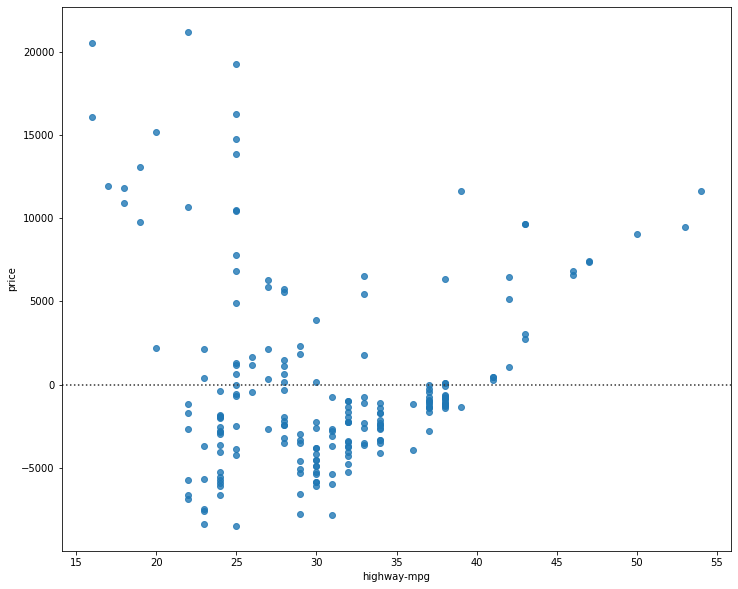

In [148]:
#Residual plot

#residual is the distance from the data point to the fitted regression line
#We look at the spread of the residuals
#If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

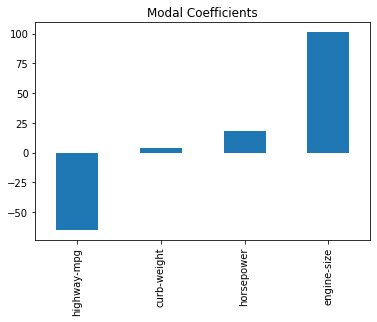

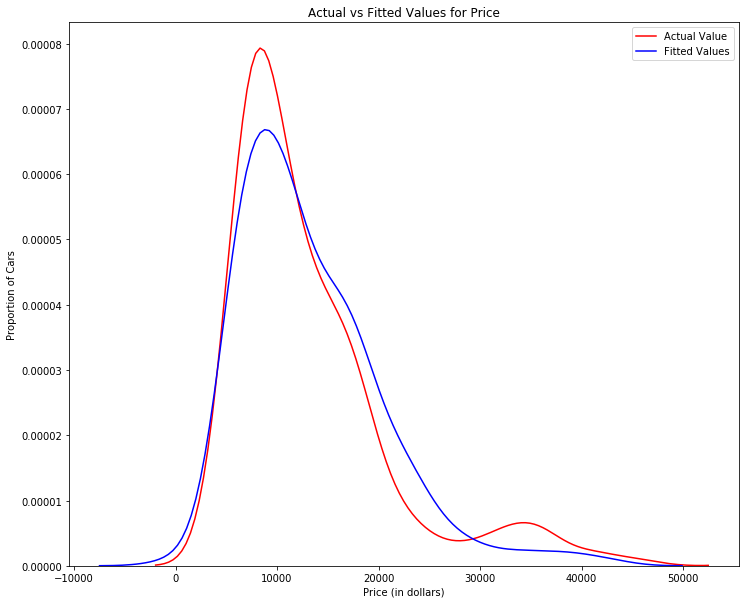

The R-square is:  0.776216755300364
The mean square error of price and predicted value using multifit is:  13788511.261583274


In [191]:
#Multiple Liner Regression   (𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋3+𝑏4𝑋4)
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])
lm.intercept_
lm.coef_


#Plot Coeff 
from pandas import Series, DataFrame
lm.fit(Z, df['price'])
predictors = Z.columns
coef = Series(lm.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')



#Prediction
Yhat=lm.predict(Z)

plt.figure(figsize=(width, height))


#Multiple regression and prediction plot
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()


#Evaluation
#R-squared, also known as the coefficient of determination. The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.
#The Mean Squared Error (MSE) measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).


#Find the R^2
#Fit the model 
lm.fit(Z, df['price'])
print('The R-square is: ', lm.score(Z, df['price']))

#Find MSE
#Prediction
Y_predict_multifit = lm.predict(Z)
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))


        3         2
-1.641 x + 213.4 x - 9226 x + 1.402e+05


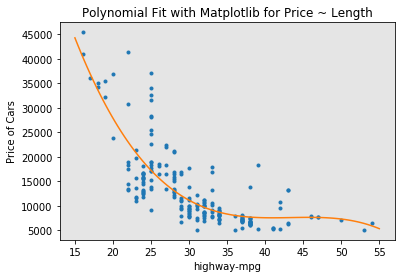

The R-square value is:  0.661145183833679


20878700.972551625

In [174]:
#Polynomial regression (Quadratic:Yhat=𝑎+𝑏1𝑋+𝑏2𝑋^2|Cubic:𝑌hat=𝑎+𝑏1𝑋+𝑏2𝑋^2+𝑏3𝑋^3|Higher order:𝑌hat=𝑎+𝑏1𝑋^2+𝑏2𝑋^2+𝑏3𝑋^3+....)

   
# Here we use a polynomial of the 3rd order (cubic) 
x = df['highway-mpg']
y = df['price']
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)


#plot function
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()
    
#plot
PlotPolly(p, x, y, 'highway-mpg')  


#Evaluation
#R-squared, also known as the coefficient of determination. The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.
#The Mean Squared Error (MSE) measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).

#Find the R^2
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

#Find MSE
mean_squared_error(df['price'], p(x))

In [157]:
df.dtypes

symboling               int64
normalized-losses       int64
make                   object
fuel-type              object
aspiration             object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
city-L/100km          float64
horsepower-binned    category
dtype: object

In [167]:
#Multivarient polynomial (degree=2: 𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋1𝑋2+𝑏4𝑋1^2+𝑏5𝑋2^2)

#Transform
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
Z_pr=pr.fit_transform(Z)

#Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree=2)), ('model',LinearRegression())]

pipe=Pipeline(Input)
Z=df[['normalized-losses','highway-mpg']]
Y=df['price']

pipe.fit(Z,Y)


#Prediction
ypipe=pipe.predict(Z)
ypipe[0:4]



<function sklearn.pipeline.Pipeline.score(self, X, y=None, sample_weight=None)>